Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
4e+12
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


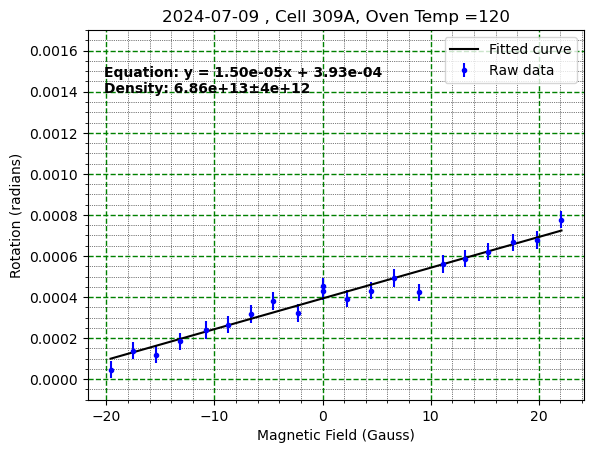

In [28]:
###########################################################################################################
# This module is used to analyze density data sets to obtain a Rb number density
# Specify a date and trial number to retrieve data from the json data files and create a plot 
###########################################################################################################

#import all the things!!!
#real python libraries
import numpy as np


#stuff I wrote
import DataSet as ds
import densityplots as den
import Functions as func
import plotSettings as ps
import Utilities as util
import densityCalculations as calc


#the date I want data for
target_date_d = '09'
target_date_m = '07'
target_date_y = '2024'

#step 1 get the data from the json file
filepath = 'Data/rotationdata_'+target_date_m+target_date_d+target_date_y+'.json'
#collection data in YYYY-MM-DD
target_date = target_date_y+'-'+target_date_m+'-'+target_date_d
trialnum = 2
my_data = util.get_data_from_file(filepath, target_date, trialnum)

#now I have the data. Excellent. Now it needs to be put into a dataSet object
analysis = ds.DataSet(my_data,func.line,'line',100)

#create a subset of data to analyze
subset = analysis.data_subset_index('after',1)
analysis = ds.DataSet(subset, func.line, 'line', 100)

#Estimate slope error form standard dev estimates from covariance matrix
std_dev = analysis.standard_deviation
olen = my_data.optical_length #optical length
laserwl = my_data.laser_wavelength #laser wavelength
density_error = calc.densityError(std_dev[1], olen, laserwl) #the Y variance is the important number here!

#estimate error from error on each data point from oscilloscope averages repotred as percent difference
ys = analysis.get_y_vals()
xs = analysis.get_x_vals()
#y_errs = analysis.get_y_error_vals()
#print()
#print(y_errs)

std_y = np.std(ys)
std_err = std_y/np.sqrt(len(ys))

error_per_point = np.zeros(len(ys))

for i in range(0, len(ys)):
    error_per_point[i]=  std_err

analysis.plotdata.y_error = error_per_point 


#error_per_point = analysis.get_y_error_vals()
#perc_e_point = np.zeros(len(error_per_point)+1)
#for i in range(0, len(error_per_point)): 
#    perc_e_point[i] = util.percent_error(ys[i], error_per_point[i])
#print('y values (from oscilloscope): ', ys)
#print('errors in rotation (from oscilloscope data): ', error_per_point)

#print('percent error for each point: ', perc_e_point[:len(error_per_point)])
#perc_e_curvefit = np.zeros(len(ys)+1)
#for i in range(0, len(ys)): 
#    perc_e_curvefit[i] = util.percent_error(ys[i], std_dev[1])
#print('percent error from line fit error: ', perc_e_curvefit[:len(ys)])


#Estimate error by comparing fit line to collected data point and taking percent difference
fitParam = analysis.getParam()
m = fitParam[0]
b = fitParam[1]

def getFitVal(x):
    val = (m*x)+b
    return val




#set the plot settings
plot_title = target_date + ' , Cell 309A, Oven Temp =120'
x_label = 'Magnetic Field (Gauss)'
y_label = 'Rotation (radians)'

vert_min = -0.0001
vert_max = 0.0017


#approximate rubidium density so we can display it on the plot
#now with estimated error value!
density, err = analysis.rb_density_formatted()

density_disp_val = str(density) + u"\u00B1" + str(density_error)

print(density_error)
#set up the plot
my_settings = ps.plotSettings(plot_title, 
                              x_label , 
                              y_label , 
                              vert_min, 
                              vert_max, 
                              analysis.plotdata, 
                              analysis.fitted_data, 
                              analysis.chisqd, 
                              analysis.equation, 
                              density_disp_val)
#plot the data with the settings specified
den.better_plot(my_settings)

